# 서울시 구별 CCTV 현황 분석하기

In [3]:
import pandas as pd
import numpy as np

##### 서울시 구별 CCTV 데이터

In [4]:
CCTV_Seoul = pd.read_csv('/Users/seoha/Downloads/data_DS/01. CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [8]:
CCTV_Seoul.rename(columns = {CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul['최근 증가율'] = (CCTV_Seoul['2016년']+CCTV_Seoul['2015년']+CCTV_Seoul['2014년'])/CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by='최근 증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [15]:
#의미 없는 컬럼 날려버리기
del CCTV_Seoul['2013년도 이전']
del CCTV_Seoul['2014년']
del CCTV_Seoul['2015년']
del CCTV_Seoul['2016년']
CCTV_Seoul.head()

,구별,소계,최근 증가율
0,강남구,2780,150.619195
1,강동구,773,166.490765
2,강북구,748,125.203252
3,강서구,884,134.793814
4,관악구,1496,149.290780


##### 서울시 인구 현황 데이터

In [6]:
POP_Seoul = pd.read_excel('/Users/seoha/Downloads/data_DS/01. population_in_Seoul.xls')
POP_Seoul

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764
5,2017.1/4,용산구,106544,244203,119132,125071,229456,111167,118289,14747,7965,6782,2.15,36231
6,2017.1/4,성동구,130868,311244,153768,157476,303380,150076,153304,7864,3692,4172,2.32,39997
7,2017.1/4,광진구,158960,372164,180992,191172,357211,174599,182612,14953,6393,8560,2.25,42214
8,2017.1/4,동대문구,159839,369496,182932,186564,354079,177021,177058,15417,5911,9506,2.22,54173
9,2017.1/4,중랑구,177548,414503,206102,208401,409882,204265,205617,4621,1837,2784,2.31,56774


In [12]:
POP_Seoul = pd.read_excel('/Users/seoha/Downloads/data_DS/01. population_in_Seoul.xls',
                         header = 2,
                         usecols = 'B, D, G, J, N')
POP_Seoul.rename(columns = {POP_Seoul.columns[0] : '구별',
                            POP_Seoul.columns[1] : '인구수',
                            POP_Seoul.columns[2] : '한국인',
                            POP_Seoul.columns[3] : '외국인',
                            POP_Seoul.columns[4] : '고령자'}, inplace=True)
POP_Seoul.drop([0], inplace=True)
POP_Seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [13]:
#결측치 제거
POP_Seoul.dropna()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [17]:
#서울의 외국인 비율
POP_Seoul['외국인 비율'] = POP_Seoul['외국인'] / POP_Seoul['인구수'] * 100
#서울의 고령자 비율
POP_Seoul['고령자 비율'] = POP_Seoul['고령자'] / POP_Seoul['인구수'] * 100
POP_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


##### DataFrame 병합하기

In [18]:
#merge : 두 데이터의 공통 컬럼으로 연결
data_result = pd.merge(CCTV_Seoul, POP_Seoul, on='구별')
data_result.head()

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


##### 상관관계 분석

In [20]:
np.corrcoef(data_result['고령자 비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [21]:
np.corrcoef(data_result['외국인 비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [22]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

##### 시각화

In [23]:
import matplotlib.pyplot as plt
# matplotlib은 한글 지원 x
plt.rcParams['font.family'] = 'AppleGothic'

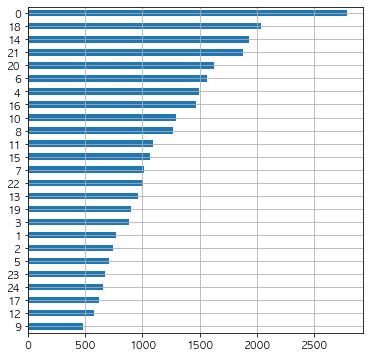

In [24]:
plt.figure()
#크기가 큰 구간부터 나올 수 있도록 정렬 => sort_values 사용
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(6,6))
plt.show()

- CCTV 갯수는 강남구가 타 지역구보다 월등히 많다.
- 상대적으로 양천구, 서초구, 은평구도 CCTV가 많다.
- 논리적 허점 : 인구수와 면적에 대한 고려가 안되어 있다.
    => 인구/면적대비 CCTV 비율이 추가적으로 필요함

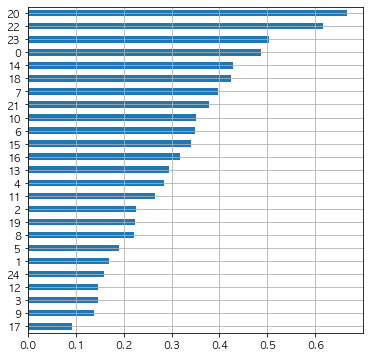

In [26]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(6,6));